# Example working with sparse data from NCEM 4D Camera
 - The sample consists of small 5 nanometer Au NPs on carbon
 - how to read the data from the HDF5 file
 - how to create create single and summed frames
 - how to create real space images
 - how to crop in real space
 - how to generate virtual dark field images

In [1]:
%matplotlib inline

from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import h5py

import stempy.io as stio
import stempy.image as stim

In [2]:
# Load a sparse 4D camera data set
file_path = Path('data_scan330_id1037_th4.5_electrons.h5')

sp = stio.load_electron_counts(file_path)

print(f'Scan dimensions = {sp.scan_shape}')
print(f'Frame dimensions = {sp.frame_shape}')

Scan dimensions = (1024, 1025)
Frame dimensions = (576, 576)


# Frames
 - create a sum of all frames
 - create one frame

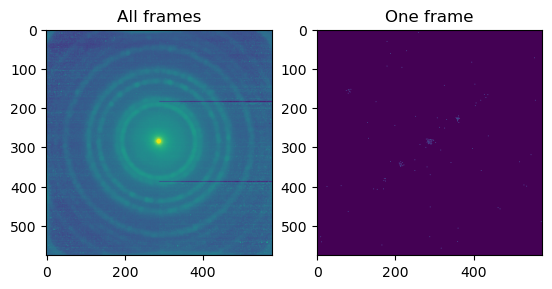

In [3]:
dp_full = sp.sum(axis=(0,1)) # sum all scan positions
dp_single = sp[50, 50, :, :] # extract on frame

fg,ax = plt.subplots(1, 2)
ax[0].imshow(dp_full, norm=LogNorm())
ax[0].set(title='All frames')
ax[1].imshow(dp_single)
ax[1].set(title='One frame');

# Generating real space images and cropping

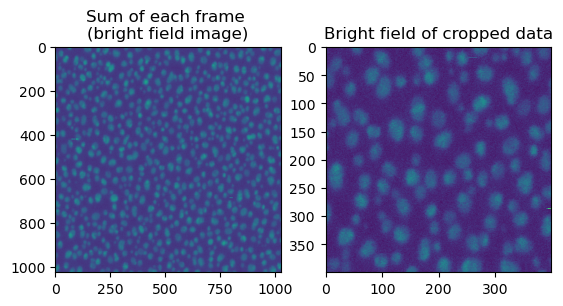

In [5]:
# Generate a bright field image by summing all intensity on
# each frame
bf = sp.sum(axis=(2, 3)) # sum intensity in all frames

# Crop in real space and create a bright field image
sp_crop = sp[400:800, 400:800, :, :] # crop near the center
bf_crop = sp_crop.sum(axis=(2,3))

fg,ax = plt.subplots(1, 2)
imax1 = ax[0].imshow(bf, vmax=200)
ax[0].set(title='Sum of each frame \n(bright field image)')
ax[1].imshow(bf_crop, vmax=200)
ax[1].set(title='Bright field of cropped data');

# Generate virtual dark field images

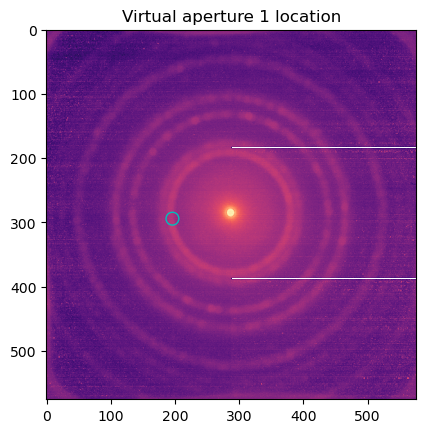

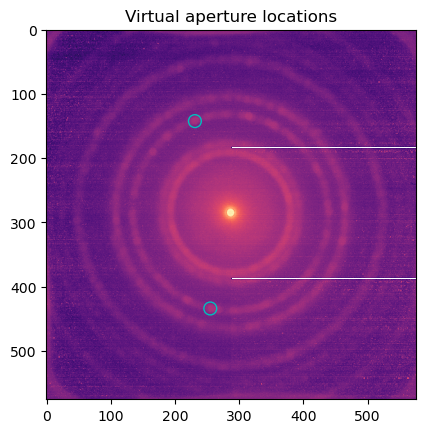

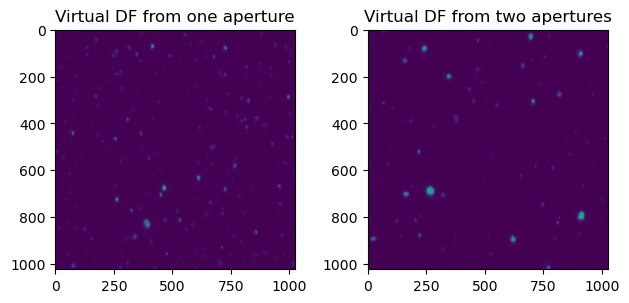

In [6]:
# Check input parameters first
ax1 = stim.plot_virtual_darkfield(dp_full, (196,), (294,), (10, ))
ax1.set(title='Virtual aperture 1 location')
# Calculate virtual dark field with one aperture
vdf1 = stim.virtual_darkfield(sp, (196, ), (294, ), (10, ))

ax2 = stim.plot_virtual_darkfield(dp_full, (231, 255), (142, 434), (10, 10))
ax2.set(title='Virtual aperture locations')
# Calculate virtual dark field with two apertures
vdf2 = stim.virtual_darkfield(sp, (231, 255), (142, 434), (10, 10))

# Plot the virtual dark field images
fg,ax = plt.subplots(1, 2)
ax[0].imshow(vdf1)
ax[0].set(title='Virtual DF from one aperture')
ax[1].imshow(vdf2)
ax[1].set(title='Virtual DF from two apertures')
fg.tight_layout();

# Mask in real space

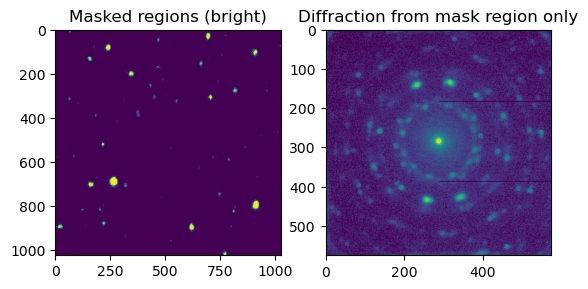

In [7]:
# Create a mask by thresholding the virtual dark field
mask = np.where(vdf2 > 2, 1, 0)

# Use the mask to generate a diffraction pattern from only
# bright regions in real space
dp_mask = stim.mask_real_space(sp, mask)

fg,ax = plt.subplots(1, 2)
ax[0].imshow(mask)
ax[0].set(title='Masked regions (bright)')
ax[1].imshow(dp_mask+0.5, norm=LogNorm())
ax[1].set(title='Diffraction from mask region only');